# Importing Libraries For Use Throughout Program 


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtale
from bokeh.plotting import figure, show


In [2]:
# Used instead of pip freeze since using anaconda.

#conda list -e > requirements.txt

In [3]:
# Installing Dtale for better analysis
#pip install dtale    # Installing dtale

# Loading The DataSet From The Location 

In [4]:
df = pd.read_excel("./UNICEF_WHO_WB_Global_Expanded_Databases_Stunting_May_2023.xlsx", sheet_name= 'Trend',header = 8 )

# Seeing The Columns In The Data Frame

In [5]:
dtale.show(df)

# Dropping Some Columns Which Are Not Necessary

### These Columns Have No Use in Our Study after obsercation :

In [6]:
drop_column_name = ['UNICEF_Survey_ID', 'ISO3Code','UNICEF_Reporting_Sub_Region', 'UNRegion', 'WHORegion', 'WB_Latest',
'DataSourceYears', 'DataSourceTypeGlobal', 'FullSourceTitle', 'LatestSource', 'Estimate_Type']

df = df.drop(drop_column_name, axis = 1)   # We drop those columns here.



# Making Some Changes In Column Names

#### Some Columns have endings as _ll, _r, _ul. These denote Lower Limit, Exact Value, Upper Limit respectively.
#### We will rename these

### We also will drop lower limit, upper limit, Footnote and _N ending columns to make out study easier

In [7]:
# Renaming Some Columns
df.columns = df.columns.str.replace(r"_ll", "_lower_limit", regex=True)
df.columns = df.columns.str.replace(r"_ul", "_upper_limit", regex=True)
df.columns = df.columns.str.replace(r"_r", "_value", regex=True)
df.columns = df.columns.str.replace(r"_valueural", "_rural", regex=True)

# Dropping Columns as mentioned above
df = df[[x for x in df if not x.endswith('Footnote')]]
df = df[[x for x in df if not x.endswith('lower_limit')]]
df = df[[x for x in df if not x.endswith('upper_limit')]]
df = df[[x for x in df if not x.endswith('_N')]]

# Renaming Columns And Setting Country as Index

In [8]:
new_column_names = {'CMRS_year' : 'Year', 'CountryName' : 'Country'}
df = df.rename(columns = new_column_names)

df.set_index("Country", inplace = True)       # Country has been set as Index

# Getting Data For India From df Using loc

# We use **DTALE** for displaying our tables.

In [9]:
df_India = df.loc['India']       # Locating India in the dataframe.
dtale.show(df_India)             # Seeing the df_india dataframe, we notice there are many unwanted columns


# Now We Will Plot Some Counties Quantiles VS Stunting 
# We Use Seaborn As Interactivity Is Not Needed For These Simple Graphs.
## We Will Also Use Bokeh Later to Get Interactive Plots.

### Indian Economic Quintiles Vs Stunting

[Text(0.5, 1.0, 'India Quintiles Vs Stunting')]

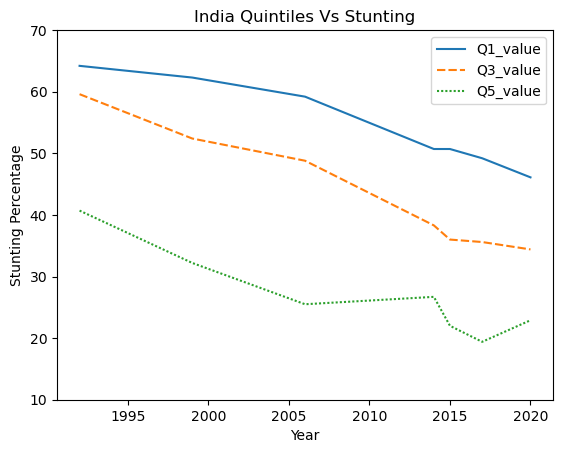

In [10]:
df_India = df_India.reset_index()

df_India_Quintiles = df_India[['Country', 'Year','Q1_value','Q3_value','Q5_value']] # We only choose these columns for analysis

df_India_Quintiles = df_India_Quintiles.dropna()     # Drop Rows with NAN as value



plt.figure()                                        # Initializing a plot

plt.ylabel('Stunting Percentage')                   # Labeling

plt.ylim(10, 70)                                    # We set the limits manually to get same limits across all graphs




df_India_Quintiles.set_index("Year", inplace = True)
 
sns.lineplot(df_India_Quintiles).set(title='India Quintiles Vs Stunting')




### Ethiopia Economic Quantiles Vs Stunting

[Text(0.5, 1.0, 'Ethiopia Quintiles Vs Stunting')]

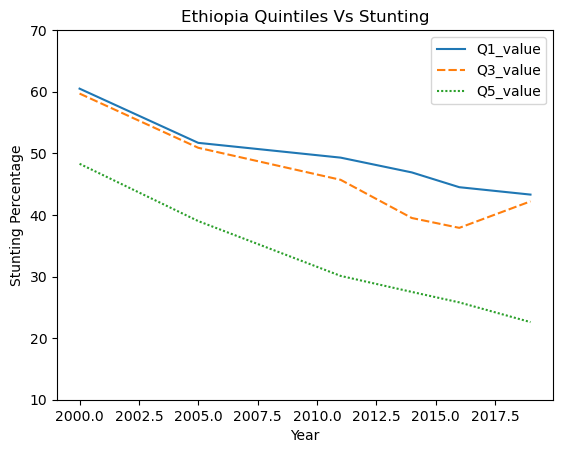

In [11]:
df_Ethiopia = df.loc['Ethiopia']

df_Ethiopia.reset_index = df_Ethiopia.reset_index(inplace = False)

df_Ethiopia_Quintiles = df_Ethiopia[['Year','Q1_value','Q3_value','Q5_value']]

df_Ethiopia_Quintiles = df_Ethiopia_Quintiles.dropna()




plt.figure()

plt.ylim(10, 70)

plt.ylabel('Stunting Percentage')



df_Ethiopia_Quintiles.set_index("Year", inplace = True)

sns.lineplot(df_Ethiopia_Quintiles).set(title='Ethiopia Quintiles Vs Stunting')





### Democratic Republic of the Congo Quantiles VS Stunting

[Text(0.5, 1.0, 'Congo Quintiles Vs Stunting')]

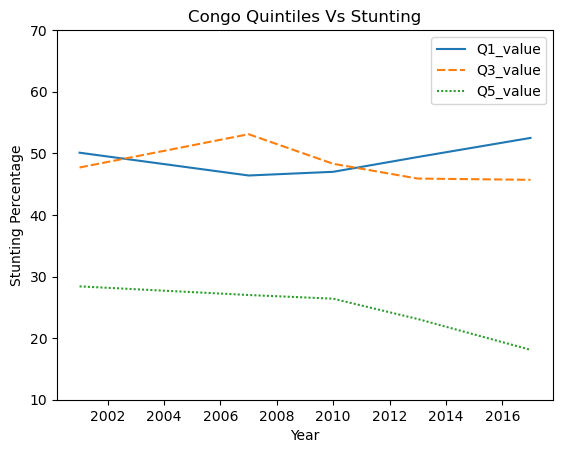

In [12]:
df_Congo = df.loc['Democratic Republic of the Congo']

df_Congo = df_Congo.reset_index()

df_Congo_Quintiles = df_Congo[['Country', 'Year','Q1_value','Q3_value','Q5_value']]

df_Congo_Quintiles = df_Congo_Quintiles.dropna()





plt.figure()

plt.ylabel('Stunting Percentage')

plt.ylim(10, 70)




df_Congo_Quintiles.set_index("Year", inplace = True)
 
sns.lineplot(df_Congo_Quintiles).set(title='Congo Quintiles Vs Stunting')


### Zambia Quantiles Vs Stunting

[Text(0.5, 1.0, 'Zambia Quintiles Vs ')]

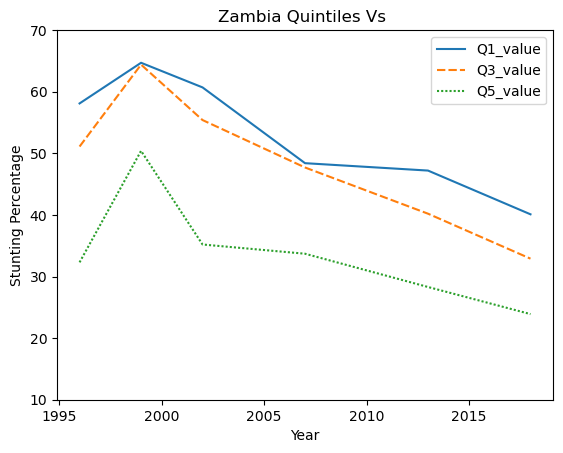

In [13]:
df_Zambia = df.loc['Zambia']

df_Zambia = df_Zambia.reset_index()

df_Zambia_quantile = df_Zambia[['Country', 'Year','Q1_value','Q3_value','Q5_value']]

df_Zambia_quantile = df_Zambia_quantile.dropna()  




plt.figure()

plt.ylabel('Stunting Percentage')

plt.ylim(10, 70)

df_Zambia_quantile.set_index("Year", inplace = True)
 
sns.lineplot(df_Zambia_quantile).set(title='Zambia Quintiles Vs ')






# Classification Of Countries Into Developed And Lower Developed According To GDP And Also Making The Appropriate Data Frames After Choosing The Useful Columns

In [14]:

Highest_GDP_Countries = ['India', 'Germany', 'Argentina', 'Brazil', 'Mexico','Republic of Korea',
                         'Türkiye', 'Thailand','Maldives','Egypt']

Lower_GDP_Countries = ['Ethiopia', 'Democratic Republic of the Congo','Zambia', 'Uzbekistan', 
                       'Zimbabwe', 'Uganda','Barbados', 'Eritrea', 'Republic of Moldova']



df_Highest_GDP_Countries = df.loc[Highest_GDP_Countries]
df_Lower_GDP_Countries = df.loc[Lower_GDP_Countries]


df_Highest_GDP_Countries = df_Highest_GDP_Countries[['Year', 'Q1_value', 'Q3_value', 'Q5_value']]
df_Highest_GDP_Countries.dropna(inplace = True)


df_Lower_GDP_Countries = df_Lower_GDP_Countries[['Year', 'Q1_value', 'Q3_value', 'Q5_value']]
df_Lower_GDP_Countries.dropna(inplace = True)




In [15]:
# We have classified into lower GDP and Higher GDP countries,
# We try to see low GDP Countries Dataframe.

dtale.show(df_Lower_GDP_Countries)

In [16]:
# We Will also see high GDP countries data frames before plotting

dtale.show(df_Highest_GDP_Countries)

# Now We See Bokeh Plot Comparing Q1 - Q3 And Q3 - Q5

In [17]:

  # Bokeh Plot


from bokeh.plotting import figure, show   

df_Lower_GDP_Countries.reset_index(inplace = True)

df_Highest_GDP_Countries.reset_index(inplace = True)

df_new = df_Lower_GDP_Countries.iloc[[5,33,38,36,34,28]]    

df_new_2 = df_Highest_GDP_Countries.iloc[[6,17,8,25,29]]

df_new = pd.concat([df_new,df_new_2], ignore_index = True)

df_new['Q1-Q3'] = abs(df_new['Q1_value'].sub(df_new['Q3_value'], axis = 0)) 

df_new['Q3-Q5'] = abs(df_new['Q3_value'].sub(df_new['Q5_value'], axis = 0)) 




p = figure(x_range=df_new['Country'], height=500,width = 1000 ,title="Quintile 1 to Quintile 5 Distribution",toolbar_location='below')

colors = [ "#e84d60","#718dbf"]

stacks = ['Q3-Q5', 'Q1-Q3']

p.vbar_stack(stacks, x='Country', width=0.8, color=colors, source=df_new,legend_label=stacks)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"

show(p)



## We Make Observations As Mentioned In Blog Post. 

### Now We Move To Calculation Part

In [18]:
df_Lower_GDP_Countries['Fraction between Q1-Q3'] = abs(df_Lower_GDP_Countries['Q1_value']-df_Lower_GDP_Countries['Q3_value'])/(abs(df_Lower_GDP_Countries['Q1_value']-df_Lower_GDP_Countries['Q5_value']))*100

# Finds what percentage of stunting is in wealth quintile 1 and 3 compared to that of 1 and 5.
# This is done across all years and countries in low GDP group as explained in blog


In [19]:
# Now we would repeat the same for Higher GDP countries.
# The mathematical calculations are explained in the Blog post


df_Highest_GDP_Countries = df_Highest_GDP_Countries.reset_index()
Dropping_index = df_Highest_GDP_Countries[((df_Highest_GDP_Countries['Q3_value'] - df_Highest_GDP_Countries['Q5_value']) < 0 )].index
df_Highest_GDP_Countries.drop(Dropping_index , inplace=True)
df_Highest_GDP_Countries['Fraction between Q1-Q3'] = abs(df_Highest_GDP_Countries['Q1_value']-df_Highest_GDP_Countries['Q3_value'])/(abs(df_Highest_GDP_Countries['Q1_value']-df_Highest_GDP_Countries['Q5_value']))*100



In [20]:
# Printing the final results

print ("Fraction Between 1st and 3rd vs total in Under Developed.")
print (df_Lower_GDP_Countries["Fraction between Q1-Q3"].mean())

print ("Fraction Between 1st and 3rd vs total in Developed.")
print (df_Highest_GDP_Countries["Fraction between Q1-Q3"].mean())

Fraction Between 1st and 3rd vs total in Under Developed.
20.99589575732953
Fraction Between 1st and 3rd vs total in Developed.
58.59575600606708


# We Make Observation That In Under Developed Countries, Q1 to Q3 is only 20% approximately of total that is Q1 to Q5.


# Where as in Developed Countries, That percent is almost triple of that and rises to a value of 60%. 